<a href="https://colab.research.google.com/github/snwnkang/CS109A_Final/blob/main/Final_Project_CS109_11112023_Sang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
pred = pd.read_csv('https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/predictors.csv')
resp = pd.read_csv('https://raw.githubusercontent.com/snwnkang/CS109A_Final/main/data/response.csv')

In [3]:
pred.describe()

,Unnamed: 0,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],InteriorFloorR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,...,program_4,program_5,program_6,program_7,program_8,program_9,WallType_0,WallType_1,WallType_2,WallType_3
count,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,3.250000e+04,32500.000000,32500.000000,32500.000000,32500.000000,...,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000,32500.000000
mean,16249.500000,179.894585,2.384207,0.321344,5.930260,7.000000e-01,4.133882,0.516276,0.516068,0.516250,...,0.099569,0.102954,0.100431,0.100338,0.097077,0.099108,0.333169,0.222492,0.222215,0.222123
std,9382.086211,104.237783,1.472428,0.814431,1.614038,1.110240e-16,1.772313,0.264802,0.264985,0.264917,...,0.299429,0.303903,0.300578,0.300455,0.296067,0.298811,0.471354,0.415926,0.415742,0.415680
min,0.000000,0.000000,0.000000,0.000000,3.760000,7.000000e-01,0.610000,0.100000,0.100000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8124.750000,90.000000,1.500000,0.000000,4.640000,7.000000e-01,3.080000,0.290000,0.290000,0.290000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16249.500000,180.000000,2.210000,0.000000,5.520000,7.000000e-01,4.680000,0.480000,0.480000,0.480000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24374.250000,270.000000,3.580000,0.000000,6.400000,7.000000e-01,5.560000,0.820000,0.820000,0.820000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,32499.000000,360.000000,5.520000,3.790000,10.490000,7.000000e-01,6.610000,0.900000,0.900000,0.900000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
resp.describe()

,Unnamed: 0,OE
count,32500.000000,32500.000000
mean,16249.500000,221.072443
std,9382.086211,217.904817
min,0.000000,32.083522
25%,8124.750000,111.055418
50%,16249.500000,147.225634
75%,24374.250000,237.394306
max,32499.000000,1079.253552


In [5]:
#InteriorFloorR is the same throughout the entire dataset (suggests a non-insulated floor type construction, which yields the same value across the entire data), so we drop this variable as it will not be useful nor helpful in our predictions
pred = pred.drop('InteriorFloorR [m^2-K/W]', axis=1)

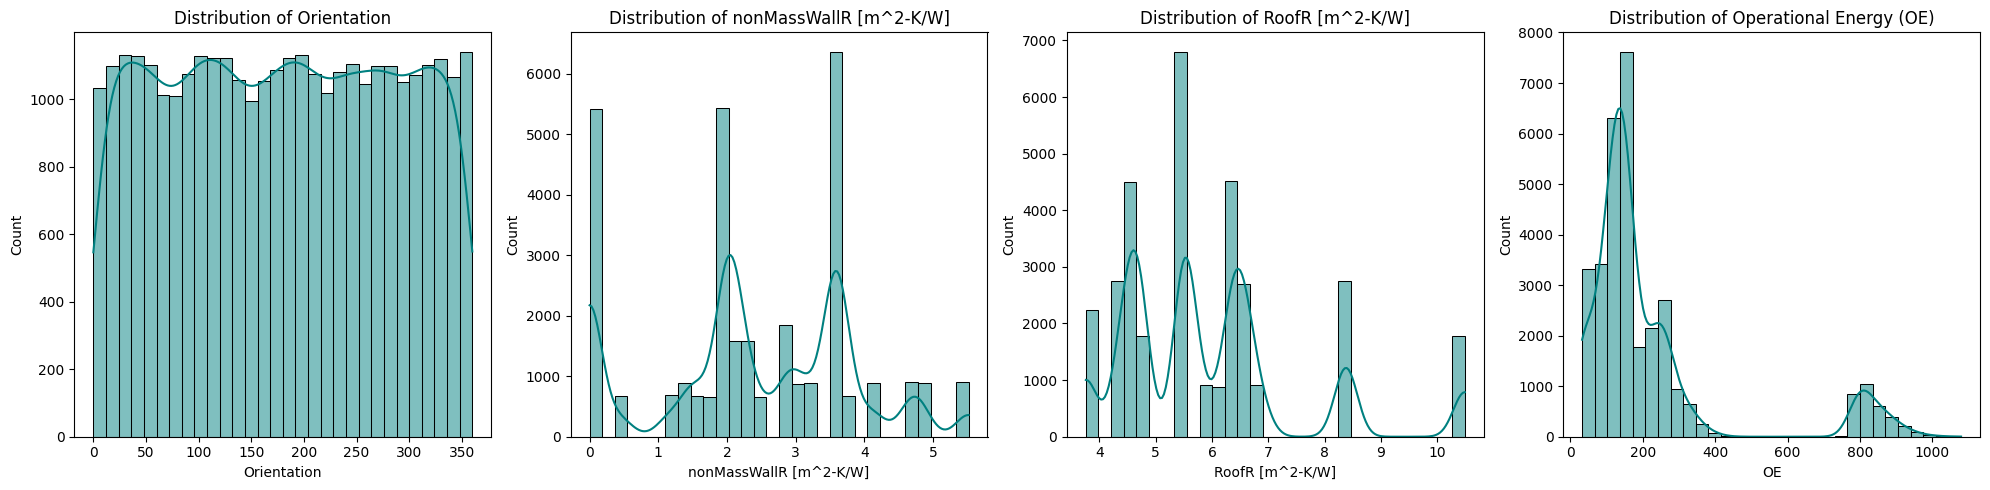

In [6]:
plt.figure(figsize=(20, 5))

# Histogram of 'Orientation'
plt.subplot(1, 4, 1)
sns.histplot(pred['Orientation'], bins=30, kde=True, color="teal")
plt.title('Distribution of Orientation')

# Histogram of 'nonMassWallR [m^2-K/W]'
plt.subplot(1, 4, 2)
sns.histplot(pred['nonMassWallR [m^2-K/W]'], bins=30, kde=True, color="teal")
plt.title('Distribution of nonMassWallR [m^2-K/W]')

# Histogram of 'RoofR [m^2-K/W]'
plt.subplot(1, 4, 3)
sns.histplot(pred['RoofR [m^2-K/W]'], bins=30, kde=True, color="teal")
plt.title('Distribution of RoofR [m^2-K/W]')

# Histogram of 'OE' (response variable)
plt.subplot(1, 4, 4)
sns.histplot(resp['OE'], bins=30, kde=True, color="teal")
plt.title('Distribution of Operational Energy (OE)')


plt.tight_layout()
plt.show()

The summary statistics for the predictors reveal a variety of scales and distributions. For instance, the orientation seems uniformly distributed between 0 and 360 degrees, non-mass wall R-values range between 0 and 5.5, and roof R-values range between 3.76 and 10.49. The response variable, operational energy (OE), has a mean of approximately 221 with a wide standard deviation of about 217, indicating significant variation in energy consumption across the dataset.

The histograms for selected predictors and the operational energy suggest the following:

The Orientation histogram is approximately uniform, suggesting no particular orientation bias in the dataset.
nonMassWallR is non-uniform, with varying frequency of values
RoofR shows a slight right skew.
The operational energy distribution is right-skewed, with a few values significantly higher than the rest, which could be potential outliers or simply represent high-energy-consuming buildings.

In [7]:
full_data = pd.concat([pred, resp], axis=1)

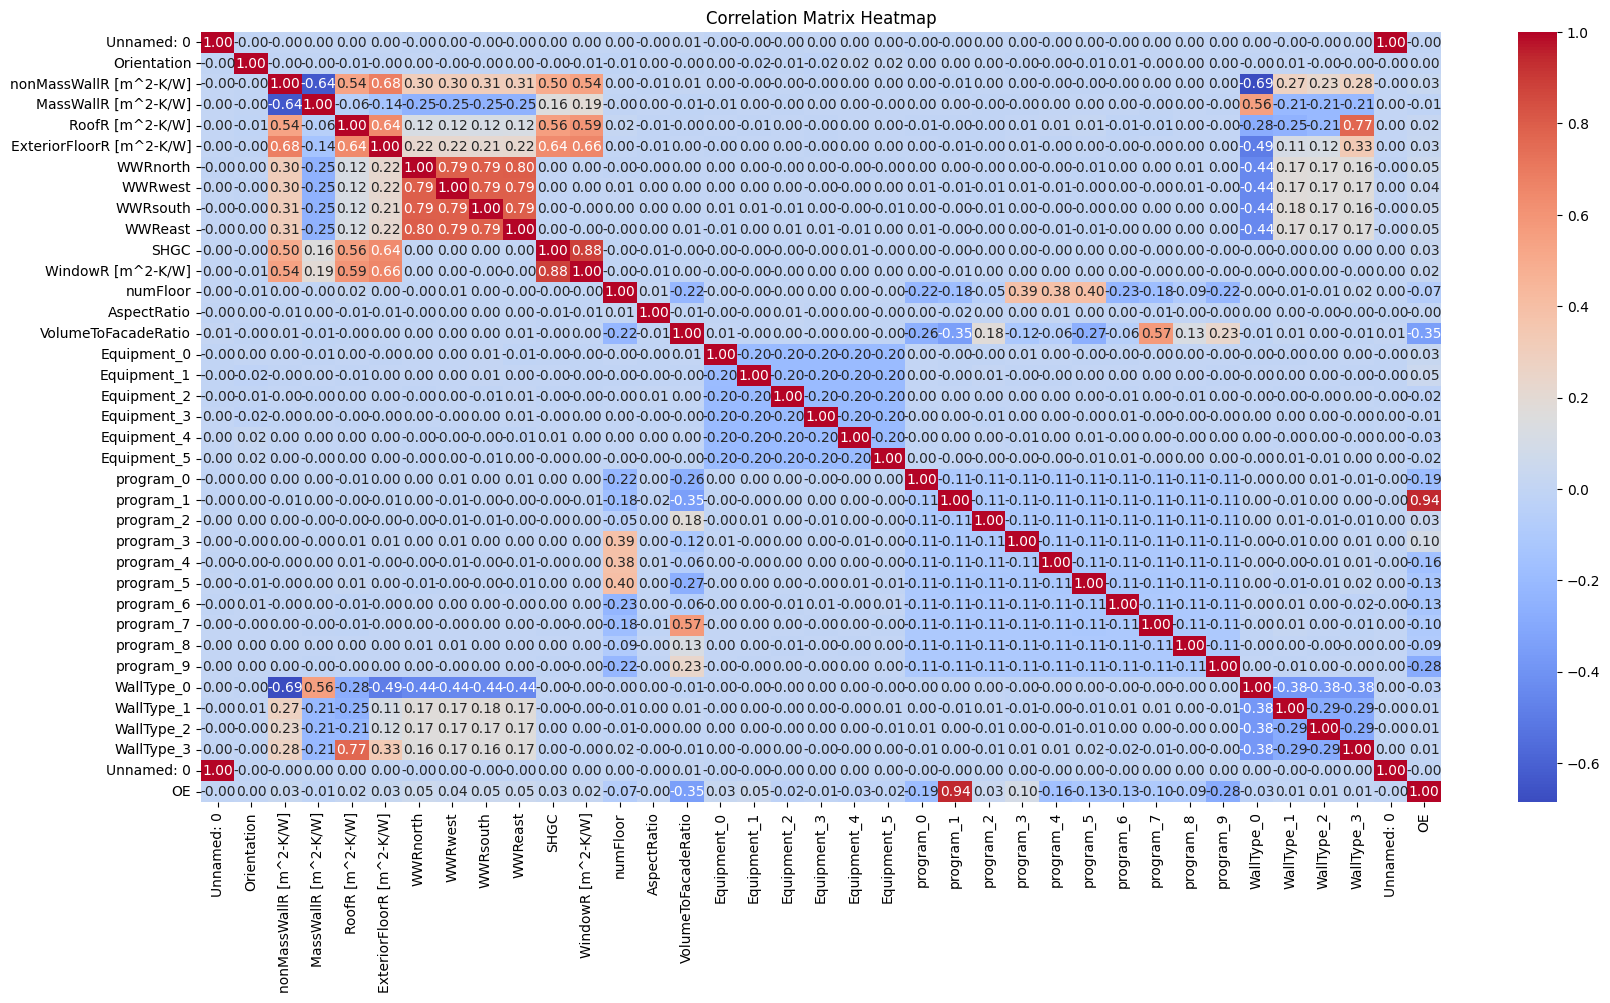

In [8]:
correlation_matrix = full_data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [9]:
correlation_matrix

,Unnamed: 0,Orientation,nonMassWallR [m^2-K/W],MassWallR [m^2-K/W],RoofR [m^2-K/W],ExteriorFloorR [m^2-K/W],WWRnorth,WWRwest,WWRsouth,WWReast,...,program_6,program_7,program_8,program_9,WallType_0,WallType_1,WallType_2,WallType_3,Unnamed: 0,OE
Unnamed: 0,1.000000,-0.001020,-0.000585,0.000671,0.000665,0.001265,-0.000714,0.000361,-0.000421,-0.000431,...,-0.003826,0.003312,0.001286,0.001905,0.001068,-0.000961,-0.000940,0.000691,1.000000,-0.001704
Orientation,-0.001020,1.000000,-0.001330,-0.002765,-0.007299,-0.003567,0.001848,-0.002675,-0.002532,0.001611,...,0.005451,-0.000301,0.001061,0.001641,-0.000796,0.005265,-0.000616,-0.003749,-0.001020,0.000017
nonMassWallR [m^2-K/W],-0.000585,-0.001330,1.000000,-0.638909,0.535895,0.679844,0.303868,0.304751,0.305721,0.305787,...,-0.000857,0.001733,0.003310,0.001460,-0.685399,0.272396,0.229055,0.275551,-0.000585,0.031669
MassWallR [m^2-K/W],0.000671,-0.002765,-0.638909,1.000000,-0.059873,-0.144050,-0.247307,-0.246290,-0.249377,-0.250139,...,0.001118,-0.002846,0.001535,-0.004329,0.558210,-0.211071,-0.210902,-0.210845,0.000671,-0.011840
RoofR [m^2-K/W],0.000665,-0.007299,0.535895,-0.059873,1.000000,0.641743,0.120713,0.121704,0.117645,0.121326,...,-0.010620,-0.009425,0.000495,-0.000595,-0.276908,-0.245318,-0.205999,0.765488,0.000665,0.023404
ExteriorFloorR [m^2-K/W],0.001265,-0.003567,0.679844,-0.144050,0.641743,1.000000,0.218610,0.217044,0.214189,0.216703,...,-0.001302,-0.000497,0.000970,0.000458,-0.492381,0.108516,0.116491,0.333239,0.001265,0.028645
WWRnorth,-0.000714,0.001848,0.303868,-0.247307,0.120713,0.218610,1.000000,0.793916,0.794421,0.796287,...,0.000099,0.002032,0.005876,0.000135,-0.442325,0.170935,0.166435,0.164072,-0.000714,0.054409
WWRwest,0.000361,-0.002675,0.304751,-0.246290,0.121704,0.217044,0.793916,1.000000,0.794876,0.792825,...,0.004812,-0.000320,0.005462,-0.000666,-0.444068,0.172602,0.165722,0.165093,0.000361,0.041038
WWRsouth,-0.000421,-0.002532,0.305721,-0.249377,0.117645,0.214189,0.794421,0.794876,1.000000,0.794344,...,0.000861,0.004019,0.001220,0.000220,-0.444411,0.177226,0.165167,0.161411,-0.000421,0.050374
WWReast,-0.000431,0.001611,0.305787,-0.250139,0.121326,0.216703,0.796287,0.792825,0.794344,1.000000,...,-0.000553,0.003755,0.002212,0.000548,-0.443415,0.171560,0.165354,0.165763,-0.000431,0.046953


**EDA Interpretation 1**

A correlation matrix is made and visualized in a heat map using seaborn to show relationships and correlation coefficients between variables. In this process we are trying to identify which variables have strong relationship with each other.

In the visualization, most interesting aspect is the VolumeToFacadeRatio having a negative correlation with Operational Energy (OE) of -0.35, suggesting that buildings with high volume to facade ratio tend to have lower operational energy consumptions, holding all variables constant. This is interesting in the context of building technology, as one may often assume that larger buildings would consume more energy, but as we are holding all other variables constant, we need to look into how the other variables influence the output.

**Class Imbalances**

Refer the plot below:
The data acquired has no class imbalances, all programs, wall types and equipment are very well balanced

In [19]:
equipment_columns = [col for col in full_data_columns if col.startswith('Equipment')]
program_columns = [col for col in full_data_columns if col.startswith('program')]
walltype_columns = [col for col in full_data_columns if col.startswith('WallType')]

equipment_counts = full_data[equipment_columns].sum(axis=0)
program_counts = full_data[program_columns].sum(axis=0)
walltype_counts = full_data[walltype_columns].sum(axis=0)

class_imbalances = {
    'Equipment': equipment_counts,
    'Program': program_counts,
    'WallType': walltype_counts
}

'/mnt/data/class_distribution_plots.png'

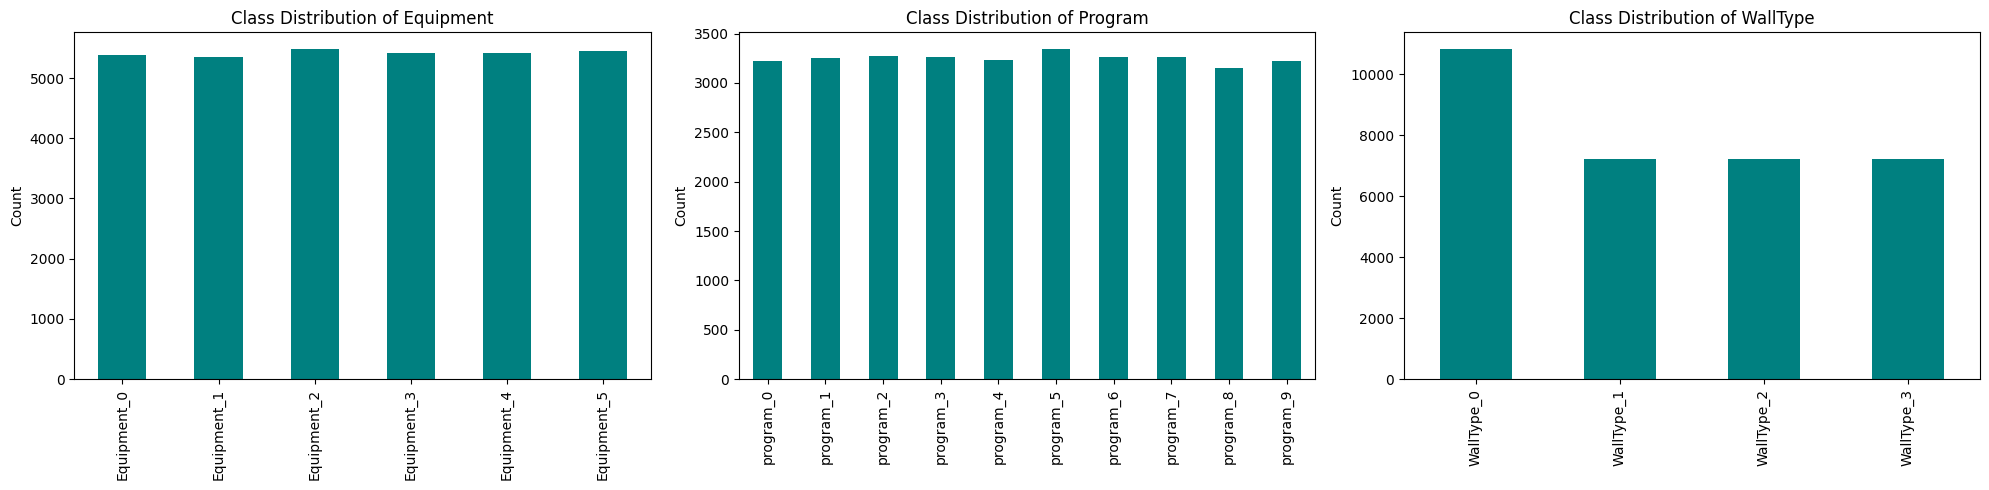

In [21]:
fig, axes = plt.subplots(1, len(class_imbalances), figsize=(20, 5))

for i, (column, counts) in enumerate(class_imbalances.items()):
    ax = axes[i] if len(class_imbalances) > 1 else axes
    counts.plot(kind='bar', ax=ax, color='teal')
    ax.set_title(f'Class Distribution of {column}')
    ax.set_ylabel('Count')

plt.tight_layout()
plot_path

**Trend Analysis**

In [ ]:
#redefine differentiation of variables
categorical_prefixes = ('Equipment_', 'program_', 'WallType_')
categorical_columns2 = [col for col in full_data.columns if col.startswith(categorical_prefixes)]
numerical_columns2 = [col for col in full_data.columns if not col.startswith(categorical_prefixes) and col != 'OE']

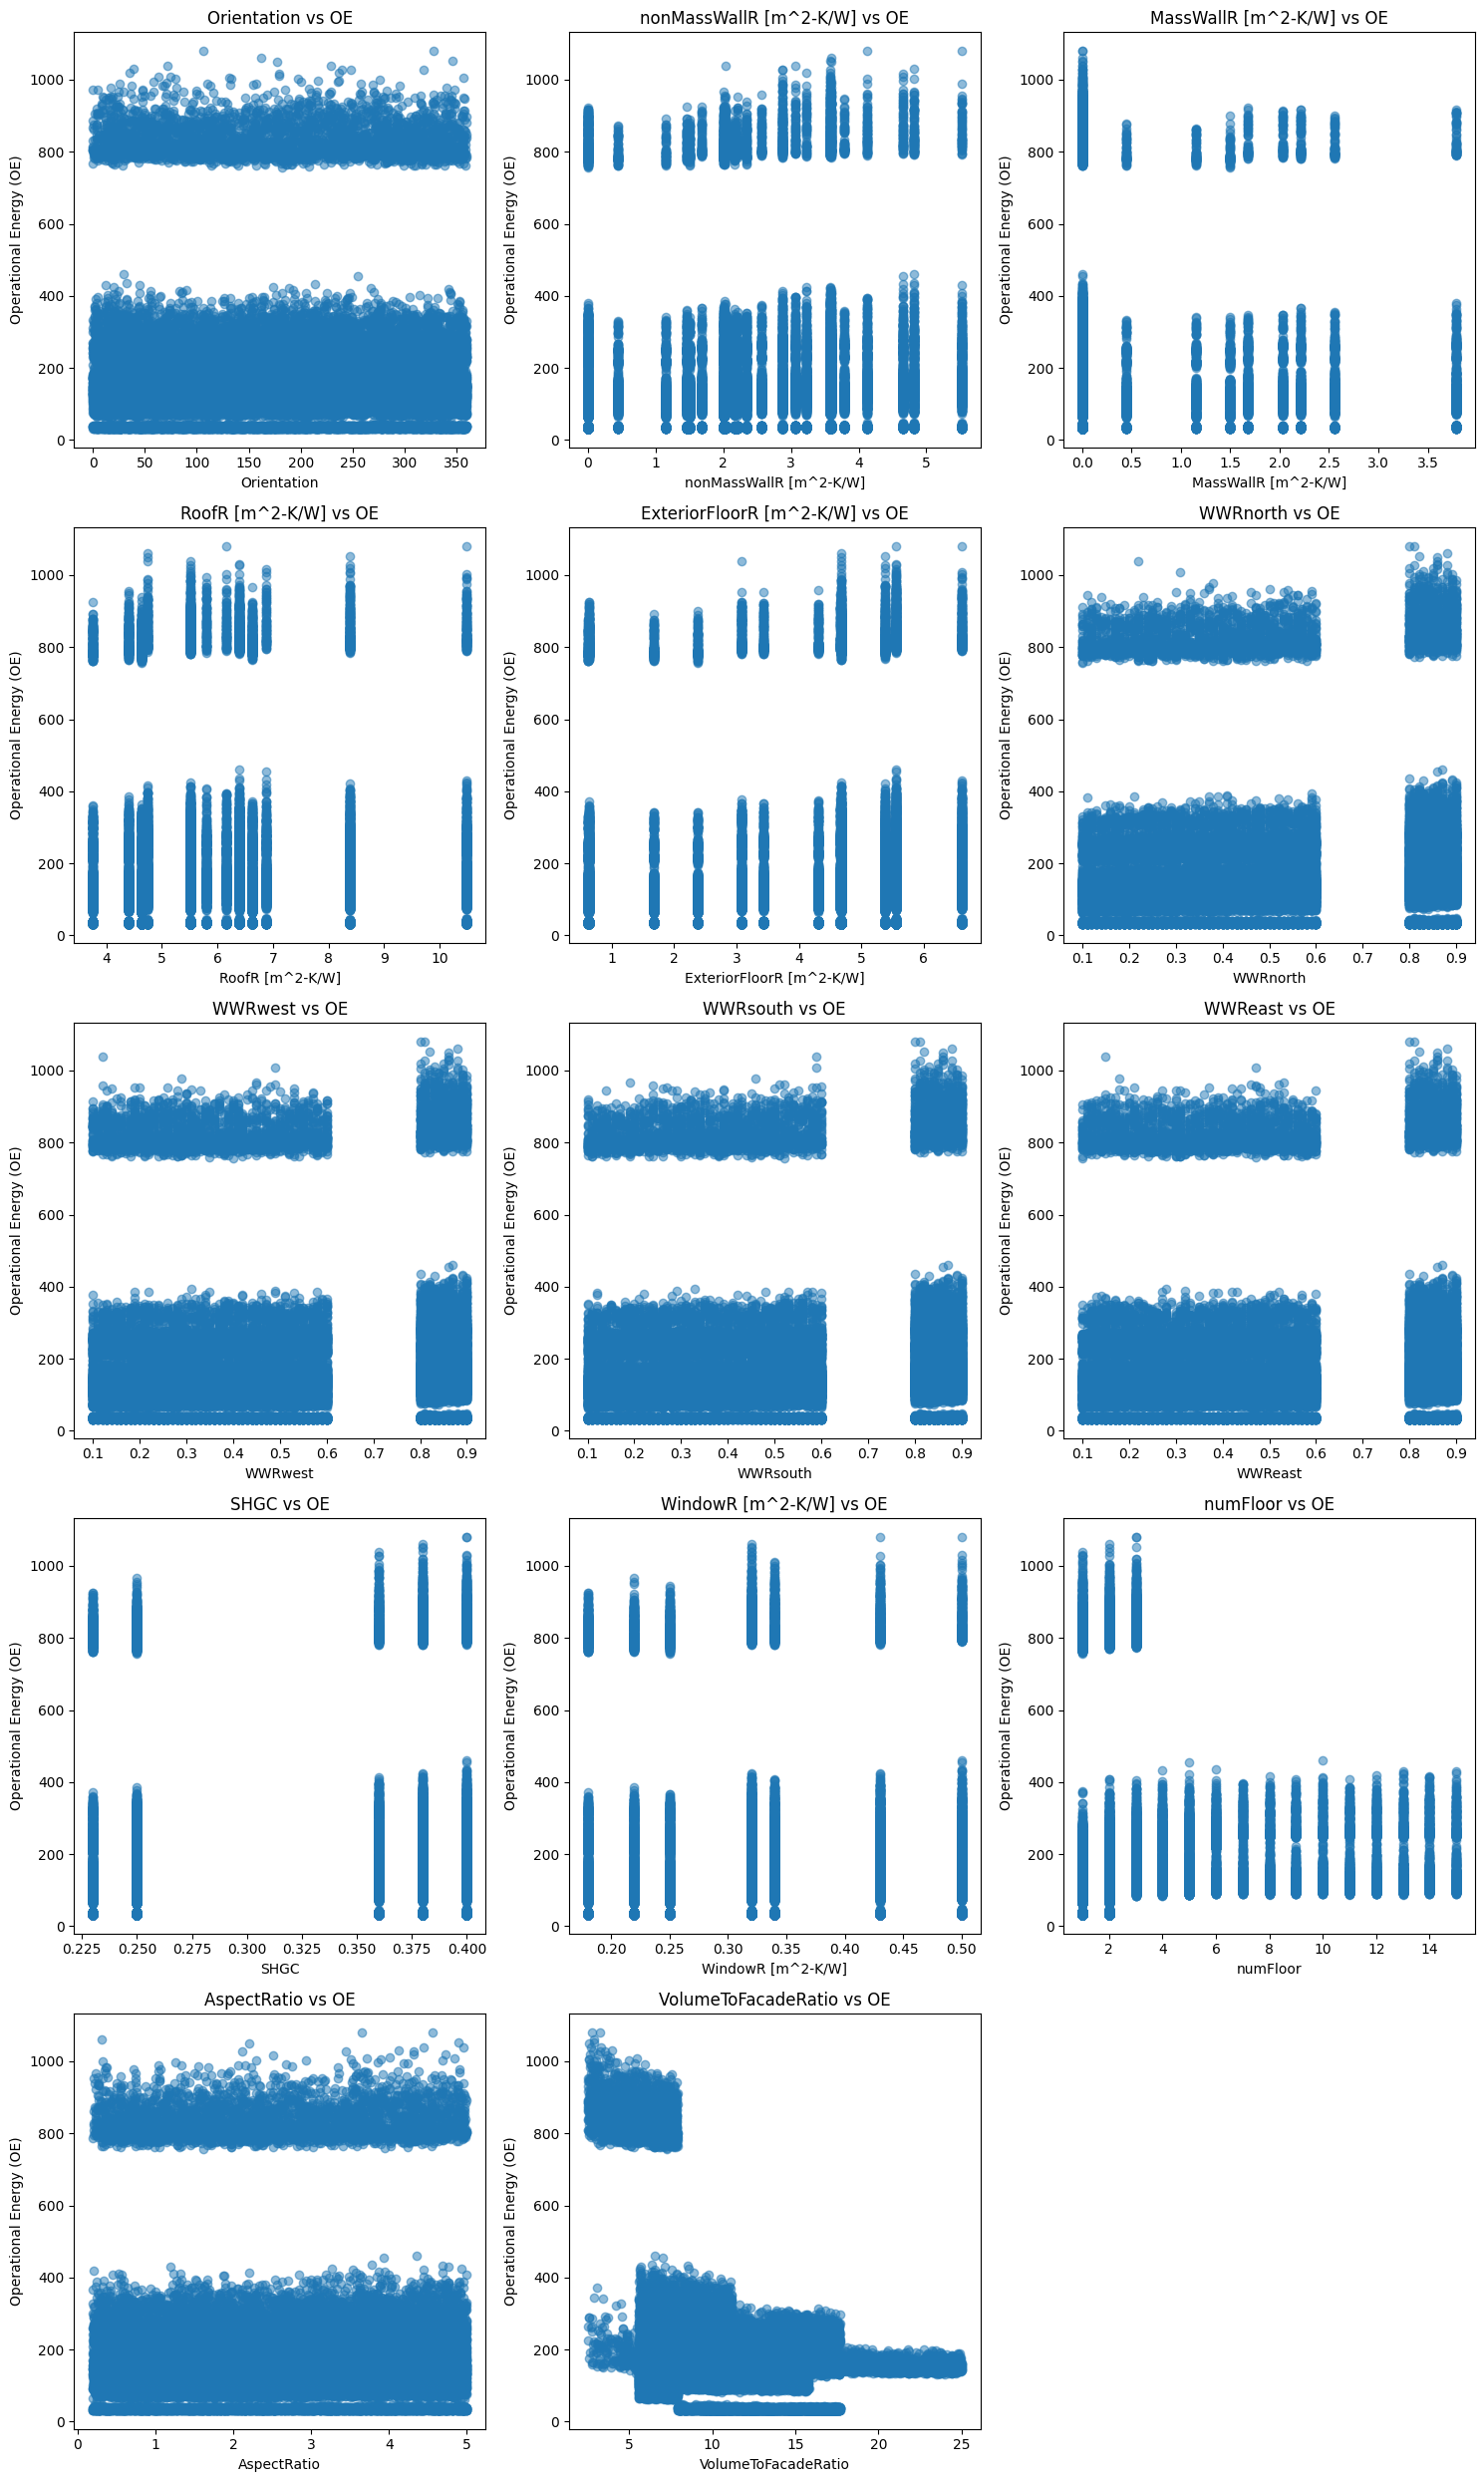

In [ ]:
num_plots = len(numerical_columns2)
cols = 3
rows = num_plots // cols + (num_plots % cols > 0)

plt.figure(figsize=(cols * 5, rows * 5))

for i, num_col in enumerate(numerical_columns2, 1):
    plt.subplot(rows, cols, i)
    plt.scatter(full_data[num_col], full_data['OE'], alpha=0.5)
    plt.title(f'{num_col} vs OE')
    plt.xlabel(num_col)
    plt.ylabel('Operational Energy (OE)')

plt.tight_layout()
plt.show()